<a href="https://colab.research.google.com/github/tsycstang/china_hdi_2016/blob/master/Geo_Analysis_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q geopandas

     |████████████████████████████████| 962kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 15.0MB/s 
     |████████████████████████████████| 14.7MB 320kB/s 


In [2]:
!git clone https://github.com/tsycstang/china_geojson

Cloning into 'china_geojson'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 433 (delta 1), reused 6 (delta 1), pack-reused 427
Receiving objects: 100% (433/433), 105.85 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Checking out files: 100% (418/418), done.


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
china_prov = gpd.read_file('zip:///content/china_geojson/china_prov.zip').astype({'code': str})

In [5]:
china_prov.head()

,code,name,region,geometry
0,440000,广东省,ZhongNan,"MULTIPOLYGON (((117.28794 23.25320, 117.28685 ..."
1,410000,河南省,ZhongNan,"MULTIPOLYGON (((111.02097 33.47121, 111.02065 ..."
2,230000,黑龙江省,DongBei,"MULTIPOLYGON (((124.14303 50.56614, 124.15190 ..."
3,650000,新疆维吾尔自治区,XiBei,"POLYGON ((86.74150 48.92107, 86.74087 48.92180..."
4,420000,湖北省,ZhongNan,"MULTIPOLYGON (((111.04675 33.20293, 111.05143 ..."


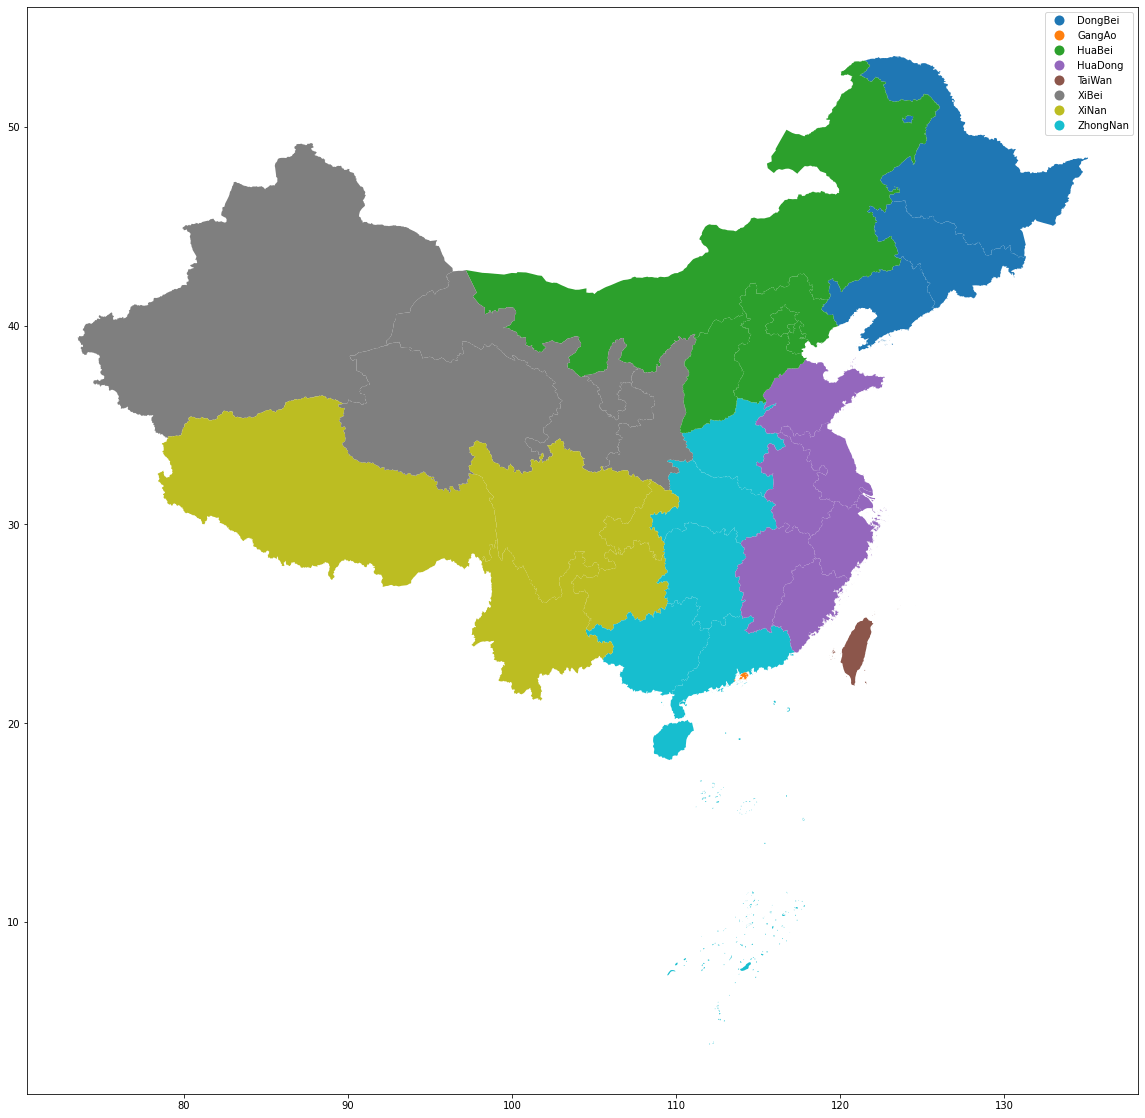

In [6]:
china_prov.plot('region', figsize=(20, 20), legend=True)

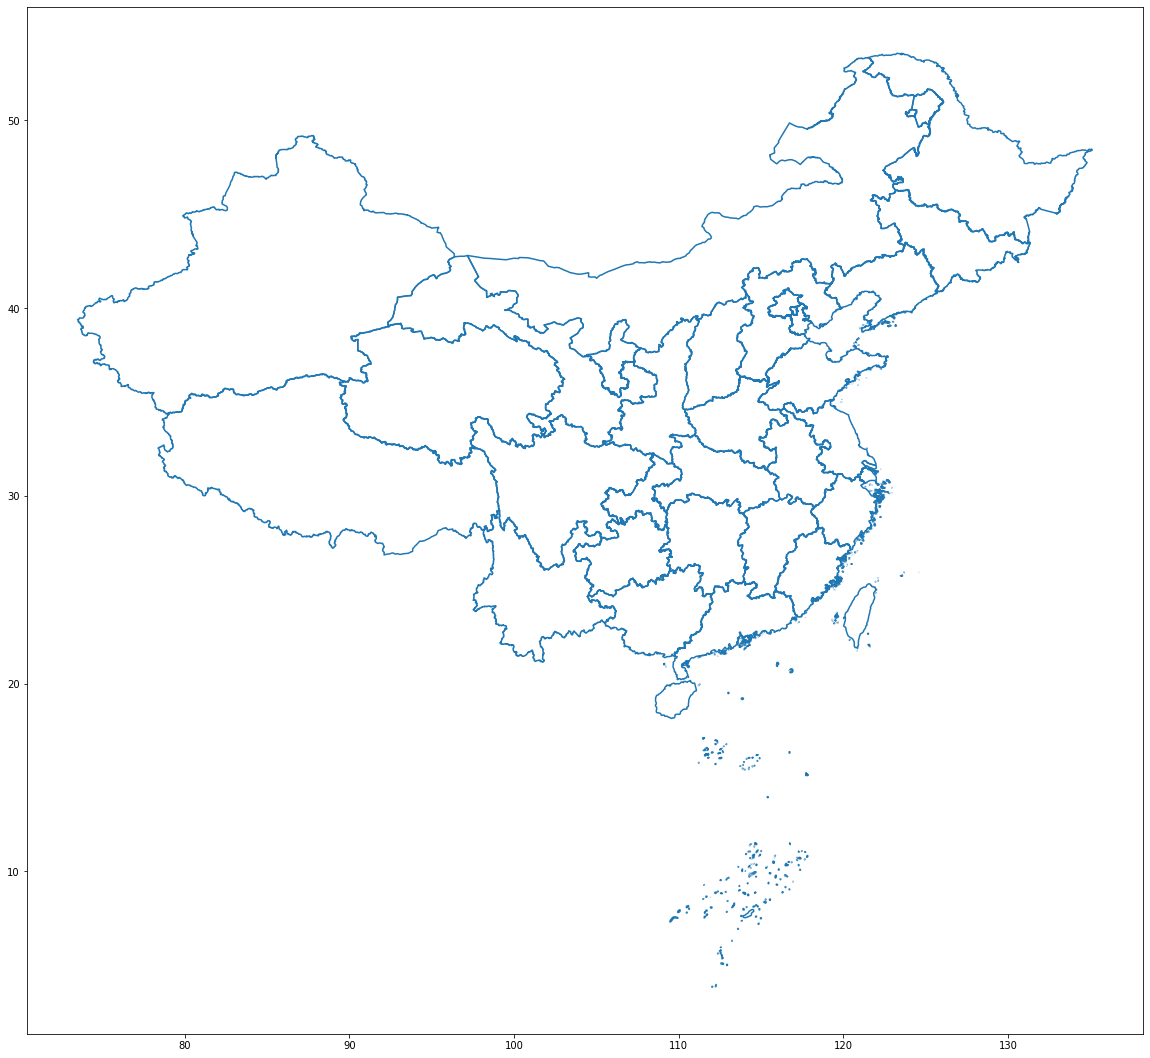

In [7]:
china_prov.boundary.plot(figsize=(20, 20))

In [8]:
china_pref = gpd.read_file('zip:///content/china_geojson/china_pref.zip').astype({'code': str})

In [9]:
china_pref.head()

,code,name,geometry
0,710000,台湾省,"MULTIPOLYGON (((119.55430 23.68248, 119.55499 ..."
1,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ..."
2,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ..."
3,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ..."
4,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096..."


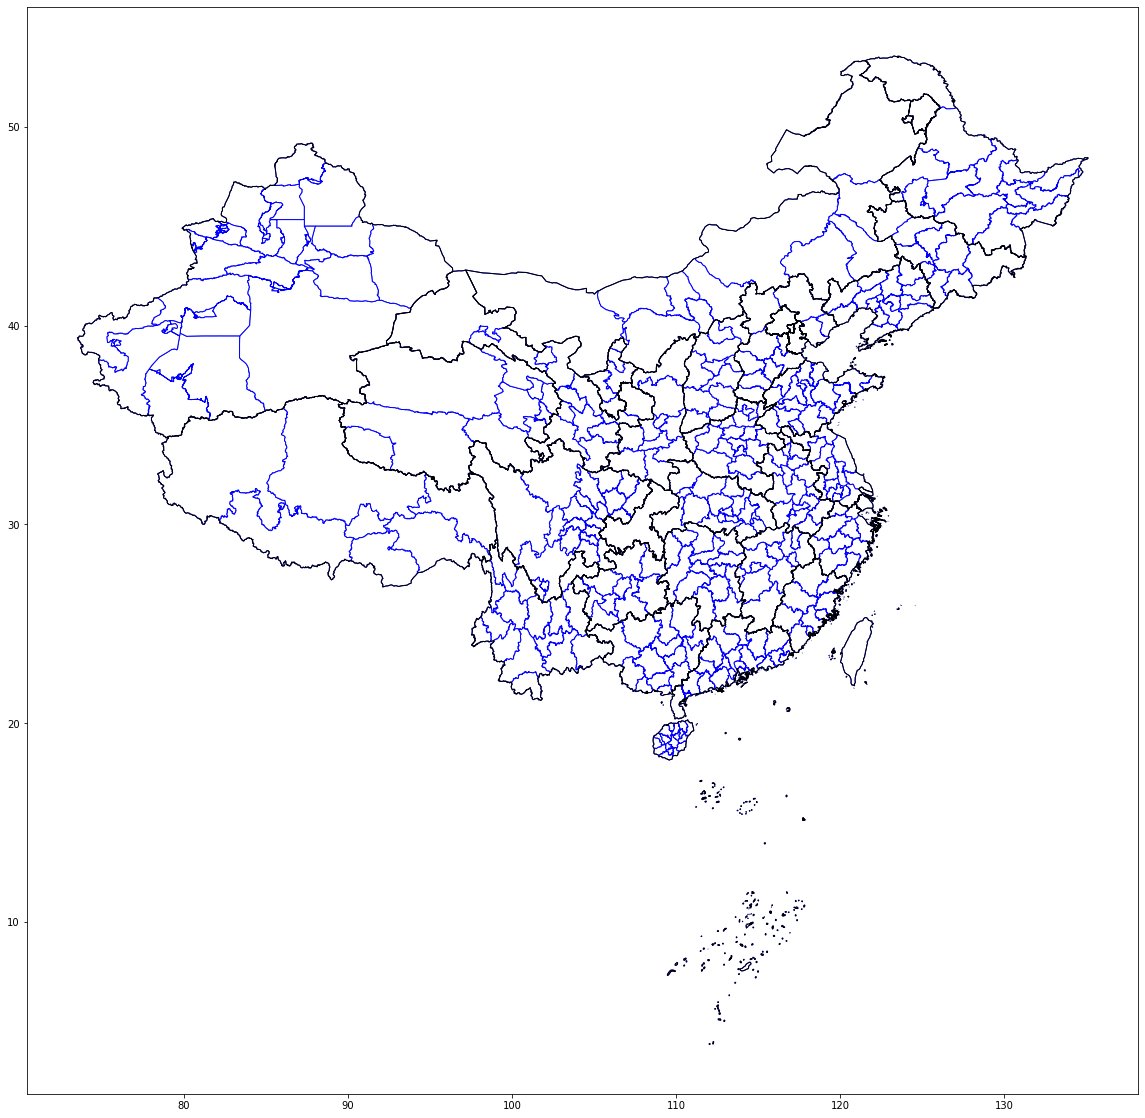

In [10]:
base = china_pref.plot(facecolor='white', edgecolor='blue', figsize=(20, 20))
china_prov.plot(ax=base, facecolor='none', edgecolor='black')

In [11]:
!git clone https://github.com/tsycstang/china_hdi_2016

Cloning into 'china_hdi_2016'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 36 (delta 14), reused 27 (delta 8), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [12]:
china_data = pd.read_csv('/content/china_hdi_2016/china_hdi_2016.csv').astype({'code': str, 'hdi': float})

In [13]:
china_data = china_data.append(pd.DataFrame([['710000', '台湾省', '全境']], columns=['code', 'province name', 'prefecture name'])).reset_index(drop=True)
china_data = china_data.append(pd.DataFrame([['810000', '香港特别行政区', '全境']], columns=['code', 'province name', 'prefecture name'])).reset_index(drop=True)
china_data = china_data.append(pd.DataFrame([['820000', '澳门特别行政区', '全境']], columns=['code', 'province name', 'prefecture name'])).reset_index(drop=True)

In [14]:
china_data

,code,province name,prefecture name,hdi
0,110100,北京市,市辖区,0.881
1,120000,天津市,市辖区,0.838
2,130100,河北省,石家庄市,0.749
3,130200,河北省,唐山市,0.766
4,130300,河北省,秦皇岛市,0.766
...,...,...,...,...
366,659009,新疆维吾尔自治区,昆玉市,NaN
367,659010,新疆维吾尔自治区,胡杨河市,NaN
368,710000,台湾省,全境,NaN
369,810000,香港特别行政区,全境,NaN


In [15]:
china_hdi = china_pref.merge(china_data, on='code')

In [16]:
china_hdi

,code,name,geometry,province name,prefecture name,hdi
0,710000,台湾省,"MULTIPOLYGON (((119.55430 23.68248, 119.55499 ...",台湾省,全境,NaN
1,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ...",安徽省,淮北市,0.738
2,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ...",安徽省,阜阳市,0.675
3,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ...",安徽省,铜陵市,0.752
4,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096...",安徽省,黄山市,0.735
...,...,...,...,...,...,...
365,330500,湖州市,"POLYGON ((119.92001 31.17092, 119.92049 31.170...",浙江省,湖州市,0.782
366,330700,金华市,"POLYGON ((119.32242 28.80091, 119.32239 28.801...",浙江省,金华市,0.771
367,330800,衢州市,"POLYGON ((119.32251 28.80507, 119.32259 28.803...",浙江省,衢州市,0.761
368,330100,杭州市,"POLYGON ((118.34497 29.47570, 118.34619 29.474...",浙江省,杭州市,0.808


(70.42268924999998, 138.17533575000002, 1.3507002999999984, 56.049953699999996)

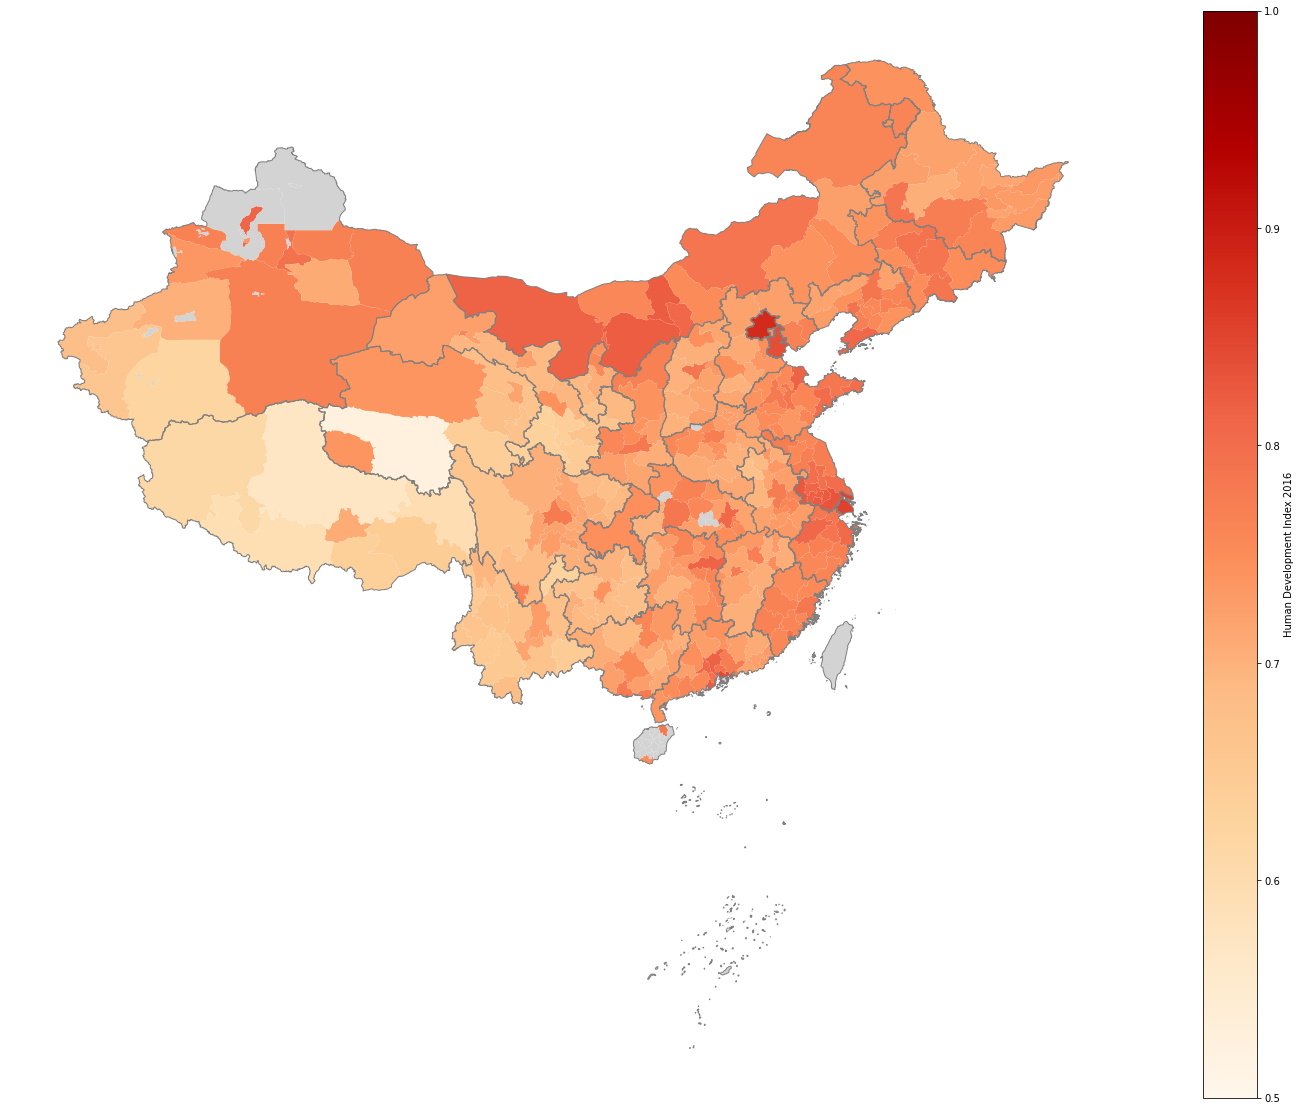

In [17]:
based = china_hdi.plot('hdi', figsize=(30, 20), legend=True, cmap='OrRd', 
                       legend_kwds={'label': "Human Development Index 2016"},
                       missing_kwds={"color": "lightgrey",}, vmin=0.5, vmax=1.
                       )
china_prov.plot(ax=based, facecolor='none', edgecolor='grey')
plt.axis('off')

(107.97855279999997, 116.5235992, 28.8171816, 33.4879224)

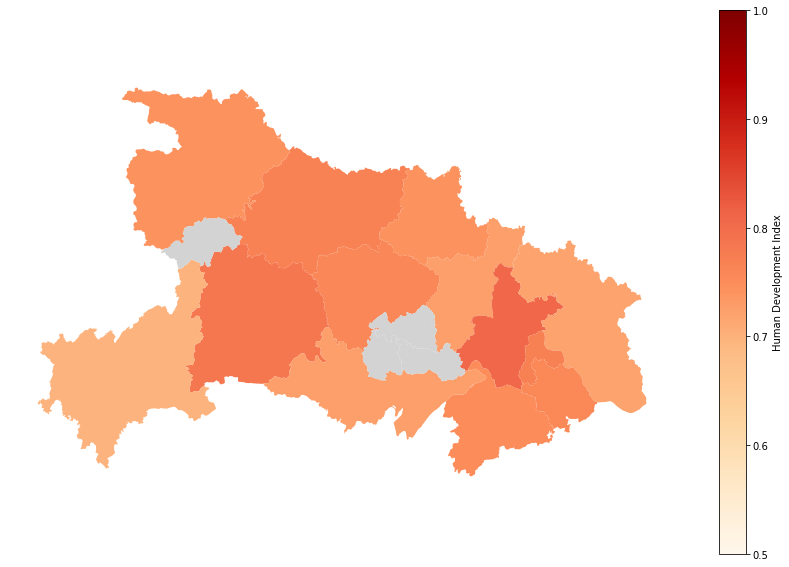

In [18]:
china_hdi[china_hdi['province name']=="湖北省"].plot(
    'hdi', legend=True, cmap='OrRd', figsize=(15, 10), 
    legend_kwds={'label': "Human Development Index"}, 
    missing_kwds={"color": "lightgrey"}, vmin=0.5, vmax=1.
    )
plt.axis('off')

(108.51731985, 114.53478514999999, 24.361821, 30.400865000000007)

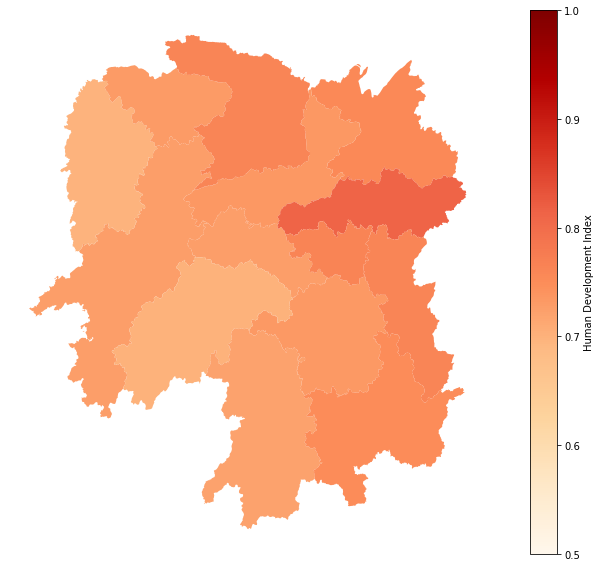

In [19]:
china_hdi[china_hdi['province name']=="湖南省"].plot(
    'hdi', legend=True, cmap='OrRd', figsize=(15, 10), 
    legend_kwds={'label': "Human Development Index"}, 
    # missing_kwds={"color": "lightgrey"}, 
    vmin=0.5, vmax=1.
    )
plt.axis('off')